# importing libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Data preparation

In [26]:
data = pd.read_csv('Salary_Data.csv')
data.info();data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# check missing value
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


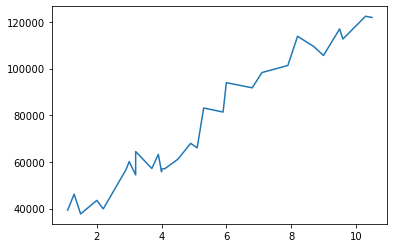

In [35]:
plt.plot(data['YearsExperience'], data.Salary)

* according to the values of the dataset, we should do rescaling 

# scaling data with MinMax

In [41]:
scaler = MinMaxScaler()
normalize_data = scaler.fit_transform(data[['YearsExperience', 'Salary']])
normalize_data

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ],
       [0.09574468, 0.06843846],
       [0.11702128, 0.02551382],
       [0.19148936, 0.22337586],
       [0.20212766, 0.26481219],
       [0.22340426, 0.19742499],
       [0.22340426, 0.31554453],
       [0.27659574, 0.229837  ],
       [0.29787234, 0.30105126],
       [0.30851064, 0.21335932],
       [0.30851064, 0.22709662],
       [0.31914894, 0.2285613 ],
       [0.36170213, 0.27616348],
       [0.40425532, 0.35680369],
       [0.42553191, 0.33425467],
       [0.44680851, 0.53575478],
       [0.5106383 , 0.51537916],
       [0.5212766 , 0.66393811],
       [0.60638298, 0.63792818],
       [0.63829787, 0.7151193 ],
       [0.72340426, 0.75089771],
       [0.75531915, 0.89866525],
       [0.80851064, 0.84691708],
       [0.84042553, 0.80145287],
       [0.89361702, 0.93595559],
       [0.90425532, 0.88476258],
       [0.9787234 , 1.        ],
       [1.        , 0.9938696 ]])

In [42]:
new_data = pd.DataFrame(normalize_data, columns=data.columns)

In [43]:
new_data.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


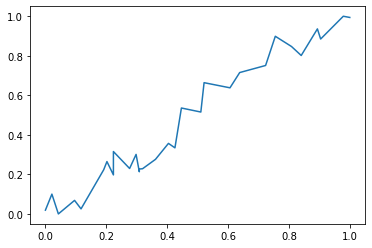

In [44]:
plt.plot(new_data['YearsExperience'], new_data.Salary)

## Train Test Splitting

In [77]:
features = new_data.iloc[:,0].to_numpy().reshape(len(new_data), 1)
target = new_data.iloc[:, -1].to_numpy().reshape(len(new_data), 1)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=1/3)

In [80]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (10, 1), (20, 1), (10, 1))

# Evaluate Model

In [82]:
LR = LinearRegression()

In [83]:
LR = LR.fit(x_train, y_train)

In [85]:
y_predict = LR.predict(x_test)

## Visualization

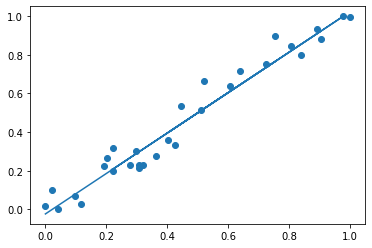

In [94]:
plt.scatter(new_data.YearsExperience, new_data.Salary)
plt.plot(x_test, y_predict )

## accuracy


In [97]:
print(r2_score(y_test, y_predict))
score = LR.score(x_test, y_test)
print("R-squared:", score)
print("MSE:", mean_squared_error(y_true=y_test, y_pred=y_predict))

0.9553063138044949
R-squared: 0.9553063138044949
MSE: 0.0049254003670683765
